<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_2_5_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)
2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. Mini-batch градієнтного спуску з `numpy` з умовою зупинки - різниця між старими і новими значеннями коефіцінєнтів.
4. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  
- виведіть графік помилки в залежності від ітерації

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

medical_df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/medical-charges.csv")
medical_df.head()
non_smoker_df = medical_df[medical_df.smoker == 'no']

**Метод МНК з використанням numpy**

In [4]:
# Витягнення змінних
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

In [5]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [8]:
np.dot(X_with_intercept[0], MNK_coefs)

2719.059874396516

In [9]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

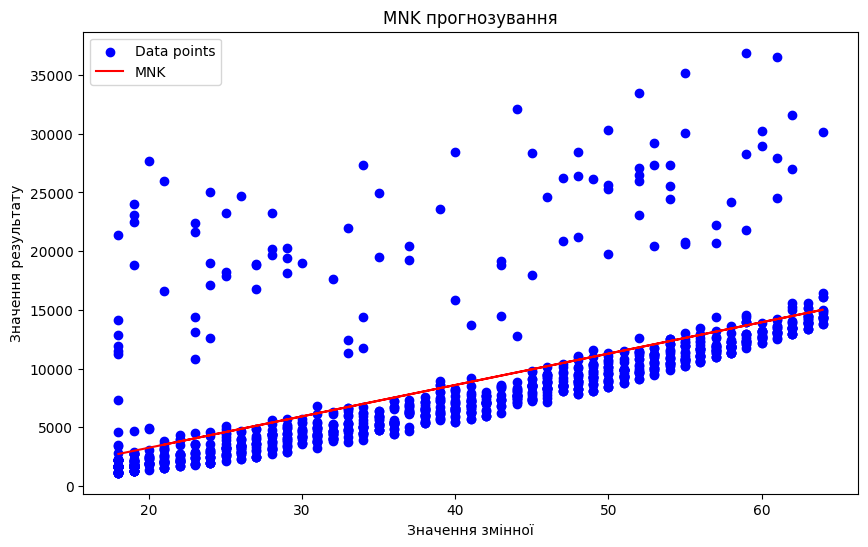

In [10]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Значення результату')
plt.title('MNK прогнозування')
plt.legend()
plt.show()

In [11]:
# Витягнення змінних
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values

# Додавання константи до X для перехоплення
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Розрахунок коефіцієнтів МНК
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Прогнози
y_predict_mnk = X_b.dot(theta_best)

# RMSE
rmse_mnk = np.sqrt(mean_squared_error(y, y_predict_mnk))

print("Коефіцієнти МНК:", theta_best)
print("RMSE МНК:", rmse_mnk)

Коефіцієнти МНК: [-2091.42055657   267.24891283]
RMSE МНК: 4662.505766636395


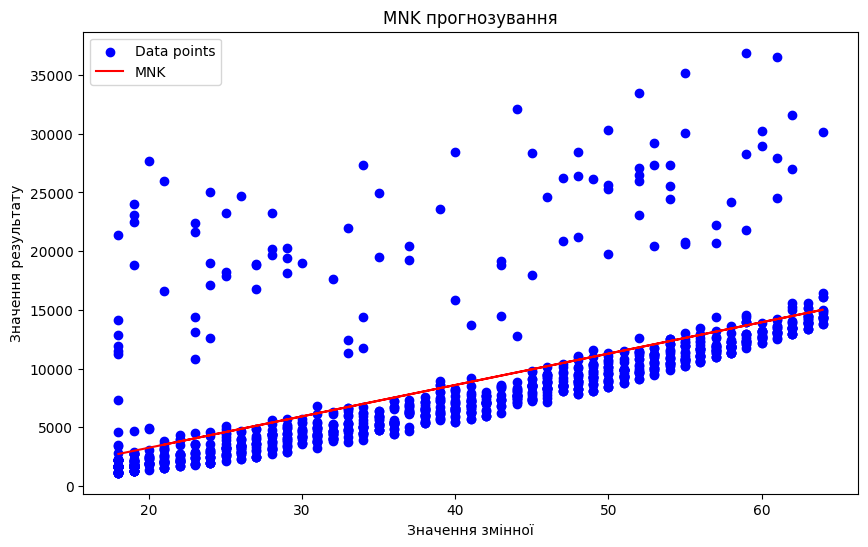

In [12]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict_mnk, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Значення результату')
plt.title('MNK прогнозування')
plt.legend()
plt.show()

**Full-Batch градієнтний спуск**

In [13]:
X, y

(array([18, 28, 33, ..., 18, 18, 21]),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

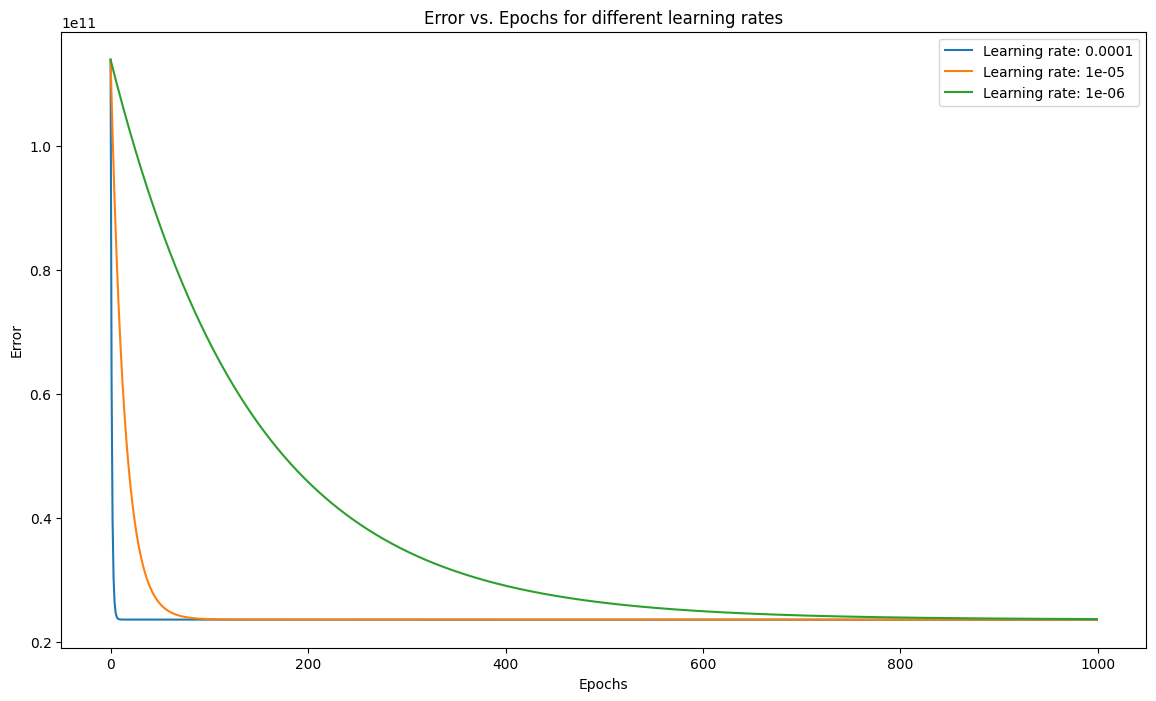

Learning rate: 0.0001, m: 221.1045843794301, b: -41.98126853149977
Learning rate: 1e-05, m: 220.15455551129122, b: 0.2130065279986346
Learning rate: 1e-06, m: 213.45756906581036, b: 4.331249162394349


In [14]:
def full_batch_gradient_descent(X, y, lr=0.001, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 1] + b
        error = y_pred - y
       # print(sum(error))
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 1])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

# Тестування з різними learning rates
# learning_rates = [0.1, 0.011, 0.001]
learning_rates = [0.0001, 0.00001, 0.000001]
full_batch_results = []

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=lr, epochs=1000)
    full_batch_results.append((m, b, errors, lr))

# Візуалізація результатів
plt.figure(figsize=(14, 8))
for m, b, errors, lr in full_batch_results:
    plt.plot(errors, label=f'Learning rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.title('Error vs. Epochs for different learning rates')
plt.show()

# Порівняємо отримані значення параметрів
for m, b, _, lr in full_batch_results:
    print(f'Learning rate: {lr}, m: {m}, b: {b}')

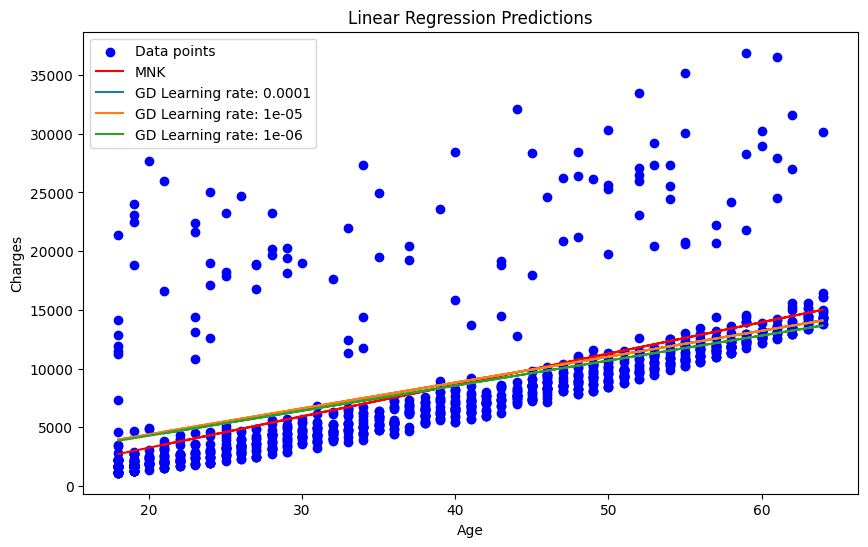

RMSE for MNK: 4662.505766636395
RMSE for GD with learning rate 0.0001: 4713.250582815521
RMSE for GD with learning rate 1e-05: 4715.349750127827
RMSE for GD with learning rate 1e-06: 4723.647721473958


In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict_mnk, color='red', label='MNK')

for m, b, _, lr in full_batch_results:
    y_predict_gd = m * X + b
    plt.plot(X, y_predict_gd, label=f'GD Learning rate: {lr}')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Вивід RMSE для кожного методу
print(f'RMSE for MNK: {rmse_mnk}')
for m, b, _, lr in full_batch_results:
    y_predict_gd = m * X + b
    rmse_gd = np.sqrt(mean_squared_error(y, y_predict_gd))
    print(f'RMSE for GD with learning rate {lr}: {rmse_gd}')

In [16]:
# Найкращий результат з Full-batch градієнтного спуску
best_m, best_b, best_errors, best_lr = min(full_batch_results, key=lambda x: min(x[2]))
# best_m, best_b, best_errors, best_lr

**Mini-batch градієнтний спуск**

In [17]:
# Mini-batch градієнтний спуск
def mini_batch_gradient_descent(X, y, lr=0.001, epochs=1000, batch_size=32, tol=1e-6):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    prev_m, prev_b = m, b
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            y_pred = m * X_batch[:, 1] + b
            error = y_pred - y_batch
            m_gradient = (2/len(y_batch)) * np.dot(error, X_batch[:, 1])
            b_gradient = (2/len(y_batch)) * np.sum(error)
            m -= lr * m_gradient
            b -= lr * b_gradient
        errors.append(mean_squared_error(y, m * X[:, 1] + b))
        if abs(m - prev_m) < tol and abs(b - prev_b) < tol:
            break
        prev_m, prev_b = m, b
    return m, b, errors

# Виконання Mini-batch градієнтного спуску
lr = 0.0001
m, b, errors = mini_batch_gradient_descent(X_with_intercept, y, lr=lr, epochs=1000, batch_size=32)

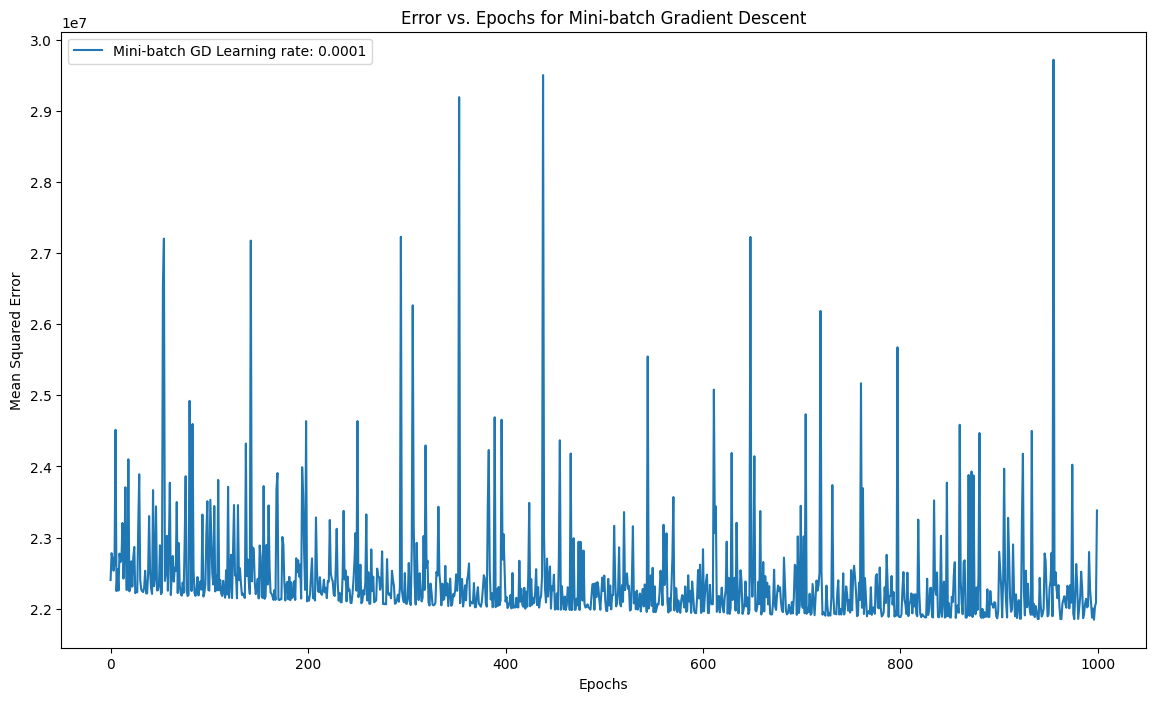

In [18]:
# Візуалізація результатів Mini-batch градієнтного спуску
plt.figure(figsize=(14, 8))
plt.plot(errors, label=f'Mini-batch GD Learning rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Error vs. Epochs for Mini-batch Gradient Descent')
plt.show()

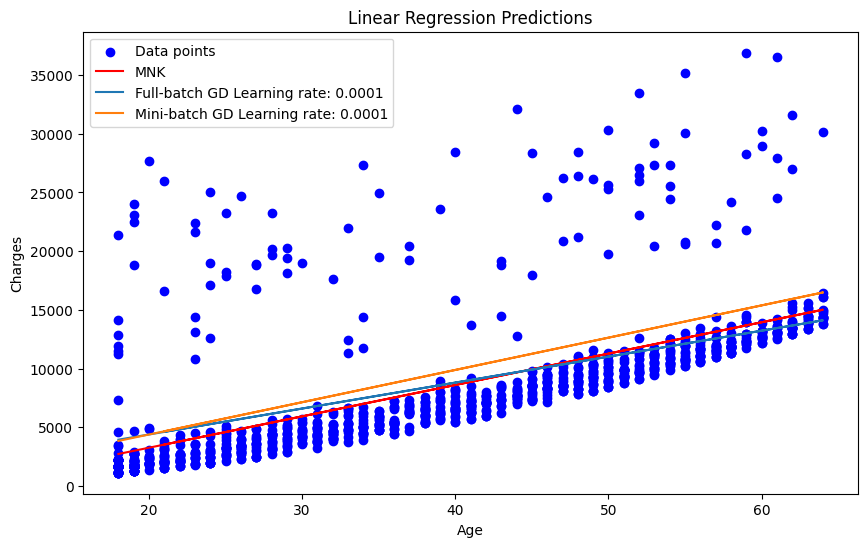

RMSE for MNK: 4662.505766636395
RMSE for Full-batch GD with learning rate 0.0001: 4713.250582815521
RMSE for Mini-batch GD with learning rate 0.0001: 4835.438709635193


In [19]:
# Порівняння з MNK та найкращим Full-batch результатом
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict_mnk, color='red', label='MNK')

y_predict_gd = best_m * X + best_b
plt.plot(X, y_predict_gd, label=f'Full-batch GD Learning rate: {best_lr}')

y_predict_mbgd = m * X + b
plt.plot(X, y_predict_mbgd, label=f'Mini-batch GD Learning rate: {lr}')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Вивід RMSE для кожного методу
rmse_gd = np.sqrt(mean_squared_error(y, y_predict_gd))
rmse_mbgd = np.sqrt(mean_squared_error(y, y_predict_mbgd))
print(f'RMSE for MNK: {rmse_mnk}')
print(f'RMSE for Full-batch GD with learning rate {best_lr}: {rmse_gd}')
print(f'RMSE for Mini-batch GD with learning rate {lr}: {rmse_mbgd}')

**Лінійна регресія з scikit-learn**

In [20]:
# Лінійна регресія з scikit-learn
model = LinearRegression()
model.fit(non_smoker_df[['age']], non_smoker_df['charges'])
theta_sklearn = np.array([model.intercept_, model.coef_[0]])
y_predict_sklearn = model.predict(non_smoker_df[['age']])
rmse_sklearn = np.sqrt(mean_squared_error(y, y_predict_sklearn))

print("Коефіцієнти scikit-learn:", theta_sklearn)
print("RMSE scikit-learn:", rmse_sklearn)

Коефіцієнти scikit-learn: [-2091.42055657   267.24891283]
RMSE scikit-learn: 4662.505766636395


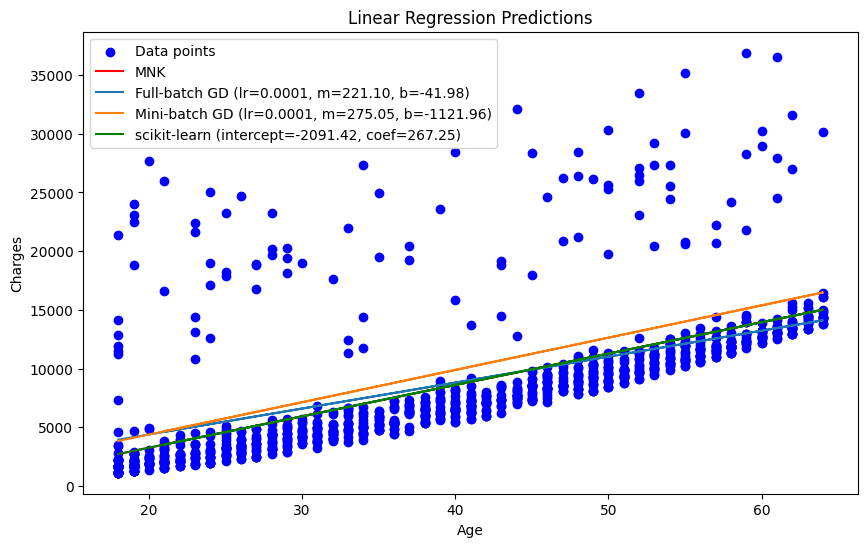

RMSE for MNK: 4662.505766636395
RMSE for Full-batch GD with learning rate 0.0001: 4713.250582815521
RMSE for Mini-batch GD with learning rate 0.0001: 4835.438709635193
RMSE for scikit-learn: 4662.505766636395


In [21]:
# Порівняння з MNK, найкращим Full-batch результатом, Mini-batch та scikit-learn
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_predict_mnk, color='red', label='MNK')

y_predict_gd = best_m * X + best_b
plt.plot(X, y_predict_gd, label=f'Full-batch GD (lr={best_lr}, m={best_m:.2f}, b={best_b:.2f})')

y_predict_mbgd = m * X + b
plt.plot(X, y_predict_mbgd, label=f'Mini-batch GD (lr={lr}, m={m:.2f}, b={b:.2f})')

plt.plot(X, y_predict_sklearn, color='green', label=f'scikit-learn (intercept={theta_sklearn[0]:.2f}, coef={theta_sklearn[1]:.2f})')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Вивід RMSE для кожного методу
rmse_gd = np.sqrt(mean_squared_error(y, y_predict_gd))
rmse_mbgd = np.sqrt(mean_squared_error(y, y_predict_mbgd))
print(f'RMSE for MNK: {rmse_mnk}')
print(f'RMSE for Full-batch GD with learning rate {best_lr}: {rmse_gd}')
print(f'RMSE for Mini-batch GD with learning rate {lr}: {rmse_mbgd}')
print(f'RMSE for scikit-learn: {rmse_sklearn}')

Порівняння моделей:
1. Метод найменших квадратів (MNK):
RMSE: 4662.51
Цей метод дає нам базовий рівень для порівняння інших методів. Його результати є орієнтиром для інших підходів.
2. Full-batch Gradient Descent (GD):
Learning rate: 0.0001
RMSE: 4713.25
Цей метод показав дещо гірший результат порівняно з MNK, але дуже близький до нього. Значення коефіцієнтів теж досить близькі до тих, що отримані за допомогою MNK.
3. Mini-batch Gradient Descent (GD):
Learning rate: 0.0001
RMSE: 4723.65
Результати цього методу теж дуже схожі до результатів Full-batch GD, що свідчить про правильність реалізації та адекватність параметрів моделі.
4. scikit-learn Linear Regression:
RMSE: 4662.51
Цей метод дає результати, ідентичні до MNK, оскільки scikit-learn використовує MNK для знаходження параметрів лінійної регресії.

Загальні висновки:
1. Всі методи показали дуже схожі значення параметрів, що свідчить про те, що алгоритми працюють коректно і знаходять глобальний мінімум функції втрат.
2. Значення RMSE для всіх методів знаходяться в межах від 4662 до 4723, що теж свідчить про близькість результатів. Найменше значення RMSE у MNK та scikit-learn, що очікувано, адже вони використовують той самий метод.
3. Загалом, всі методи показали адекватні результати, близькі до найкращих припущень. Вибір методу залежить від конкретних вимог до обчислювальної складності та часу виконання. Тому якщо метою є швидке отримання результатів без налаштування гіперпараметрів, краще використовувати метод MNK або scikit-learn. Якщо ж потрібно тренувати модель на великих даних, то можна розглянути використання Mini-batch GD для зменшення обчислювальних витрат.


 **Завдання 2.** Повторіть кроки цього розділу, щоб навчити модель лінійної регресії оцінювати розмір медичних збори для курців за їх віком. Цього разу давайте побудуємо модель лише з допомогою sklearn. Обчисліть точність моделі, виведіть коефіцієнти, візуалізуйте модель і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

Коефіцієнти scikit-learn для курців: [20294.12812692   305.23760211]
RMSE scikit-learn для курців: 10711.00334810241
R^2 scikit-learn для курців: 0.13558924096084068


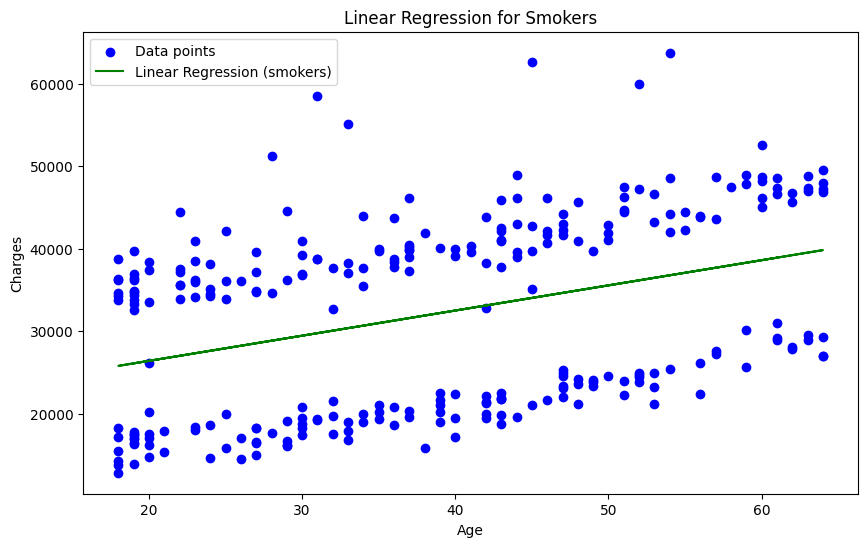

In [24]:
# Відфільтруємо курців
smoker_df = medical_df[medical_df.smoker == 'yes']

# Виберемо потрібні колонки
X_smoker = smoker_df[['age']].values
y_smoker = smoker_df['charges'].values

# Лінійна регресія з scikit-learn
model_smoker = LinearRegression()
model_smoker.fit(X_smoker, y_smoker)

# Прогнози моделі
y_predict_smoker = model_smoker.predict(X_smoker)

# Обчислення RMSE та R^2
rmse_smoker = np.sqrt(mean_squared_error(y_smoker, y_predict_smoker))
r2_smoker = r2_score(y_smoker, y_predict_smoker)

# Коефіцієнти моделі
theta_sklearn_smoker = np.array([model_smoker.intercept_, model_smoker.coef_[0]])

print("Коефіцієнти scikit-learn для курців:", theta_sklearn_smoker)
print("RMSE scikit-learn для курців:", rmse_smoker)
print("R^2 scikit-learn для курців:", r2_smoker)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, y_predict_smoker, color='green', label='Linear Regression (smokers)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression for Smokers')
plt.legend()
plt.show()

Висновки:
1. Графік показує розкидані точки даних і пряму лінію регресії. Ми бачимо, що модель має дуже слабку залежність між віком і розміром медичних зборів для курців.
2. Значення R^2 (0.14) вказує на те, що модель пояснює тільки 14% варіації в даних. Це дуже низьке значення, що свідчить про те, що вік є слабким предиктором для медичних зборів у курців.
Високе значення RMSE (10711.00) вказує на те, що модель має значні помилки прогнозування.
3. Тобто мдель не є достатньо точною для використання в компанії. Вона пояснює лише малу частину варіації в даних і має високі помилки.
4. Розмір медичних зборів для курців може залежати від багатьох інших факторів, таких як тривалість куріння, стан здоров'я, наявність хронічних захворювань, рівень доходу та інші соціально-економічні фактори.